In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df1 = pd.read_csv('QVI_purchase_behaviour.csv')

In [3]:
df1.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
df1.shape

(72637, 3)

In [5]:
df2 = pd.read_excel('QVI_transaction_data.xlsx')

In [6]:
df2.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
df2.shape

(264836, 8)

In [8]:
df = pd.merge(df1, df2, on='LYLTY_CARD_NBR', how='inner')

In [9]:
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [10]:
df.shape

(264836, 10)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264836 non-null  int64  
 1   LIFESTAGE         264836 non-null  object 
 2   PREMIUM_CUSTOMER  264836 non-null  object 
 3   DATE              264836 non-null  int64  
 4   STORE_NBR         264836 non-null  int64  
 5   TXN_ID            264836 non-null  int64  
 6   PROD_NBR          264836 non-null  int64  
 7   PROD_NAME         264836 non-null  object 
 8   PROD_QTY          264836 non-null  int64  
 9   TOT_SALES         264836 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [12]:
df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
dtype: int64

So there is no missing value is present in our data

In [13]:
df[df.duplicated()]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
106249,107024,OLDER SINGLES/COUPLES,Premium,43374,107,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [14]:
#We have dopped the duplicate entry
df = df.drop_duplicates()

In [15]:
df['DATE'].unique()

array([43390, 43359, 43531, 43532, 43406, 43462, 43438, 43439, 43424,
       43352, 43448, 43310, 43412, 43435, 43453, 43539, 43635, 43528,
       43574, 43625, 43346, 43432, 43636, 43492, 43328, 43375, 43587,
       43397, 43612, 43516, 43425, 43442, 43287, 43325, 43621, 43639,
       43548, 43553, 43441, 43403, 43302, 43508, 43578, 43512, 43646,
       43509, 43314, 43489, 43568, 43368, 43348, 43319, 43428, 43501,
       43289, 43616, 43520, 43374, 43556, 43591, 43580, 43427, 43506,
       43502, 43518, 43354, 43367, 43629, 43400, 43475, 43603, 43484,
       43308, 43559, 43483, 43601, 43434, 43524, 43634, 43370, 43523,
       43543, 43632, 43407, 43306, 43565, 43361, 43547, 43582, 43460,
       43394, 43283, 43431, 43590, 43383, 43521, 43298, 43301, 43530,
       43598, 43607, 43608, 43552, 43290, 43451, 43377, 43550, 43338,
       43351, 43362, 43363, 43522, 43572, 43529, 43295, 43337, 43592,
       43366, 43347, 43597, 43320, 43500, 43447, 43643, 43416, 43579,
       43477, 43611,

In [16]:
# Convert the integer array to datetime format
reference_date = pd.Timestamp('1899-12-30')
df['DATE'] = reference_date + pd.to_timedelta(df['DATE'], unit='D')

# Now 'date_series' contains the dates in the correct datetime format
print(df['DATE'])

0        2018-10-17
1        2018-09-16
2        2019-03-07
3        2019-03-08
4        2018-11-02
            ...    
264831   2018-12-08
264832   2018-10-01
264833   2018-10-24
264834   2018-10-27
264835   2018-12-14
Name: DATE, Length: 264835, dtype: datetime64[ns]


In [17]:
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [18]:
## Generate a summary of the PROD_NAME column
df['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [19]:
import re



# Convert the PROD_NAME column to lowercase
df['PROD_NAME'] = df['PROD_NAME'].str.lower()

# Define a function to clean words
def clean_word(word):
    return re.sub(r'[^a-zA-Z]', '', word)

# Split words in each product name and clean them
productWords = df['PROD_NAME'].str.split().explode().apply(clean_word)

# Remove words with digits and special characters
productWords = productWords[~productWords.str.isdigit()]

# Create a DataFrame with word frequencies
word_counts = productWords.value_counts().reset_index()
word_counts.columns = ['word', 'frequency']

# Filter out salsa products
productwords = df[~df['PROD_NAME'].str.contains('salsa')]

# Display the results
print(word_counts)

         word  frequency
0           g     251230
1       chips      49770
2      kettle      41288
3                  35565
4      smiths      28859
..        ...        ...
191  sunbites       1432
192        pc       1431
193    garden       1419
194       ncc       1419
195     fries       1418

[196 rows x 2 columns]


In [20]:
df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
dtype: int64

In [21]:
df.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,2.648350e+05,264835.000000,2.648350e+05,264835.000000,264835.000000,264835.000000
mean,1.355496e+05,135.080216,1.351584e+05,56.583201,1.907308,7.304205
std,8.058011e+04,76.784306,7.813316e+04,32.826692,0.643655,3.083231
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000
25%,7.002100e+04,70.000000,6.760100e+04,28.000000,2.000000,5.400000
50%,1.303580e+05,130.000000,1.351380e+05,56.000000,2.000000,7.400000
75%,2.030945e+05,203.000000,2.027015e+05,85.000000,2.000000,9.200000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,200.000000,650.000000


C:\Users\devan\AppData\Local\Temp\ipykernel_18952\2241278526.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap = 'rainbow')


<Axes: >

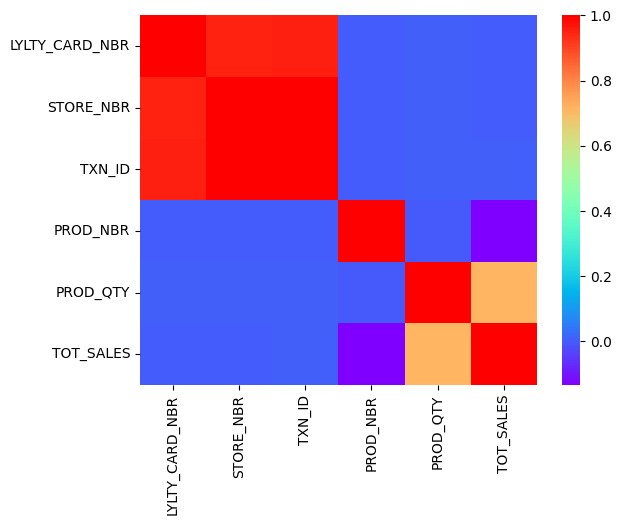

In [22]:
sns.heatmap(df.corr(),cmap = 'rainbow')

<Axes: xlabel='PROD_QTY', ylabel='TOT_SALES'>

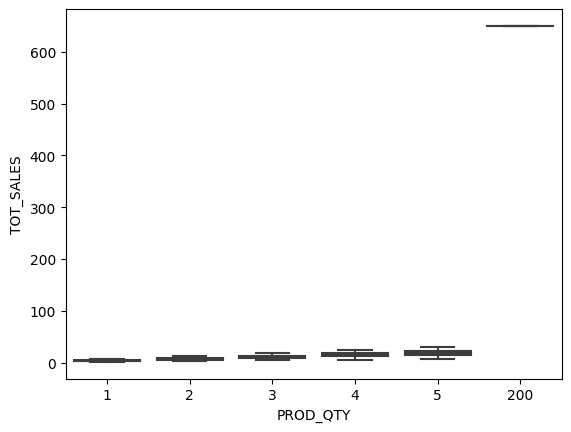

In [23]:
#hecking for outliers
sns.boxplot(x = 'PROD_QTY', y = 'TOT_SALES', data = df)

product quantity appears to have an outlier.  Let's investigate further the case where 200
packets of chips are bought in one transaction.

In [24]:
# Find transactions where 200 packets of chips are bought
df[df['PROD_QTY'] == 200]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
221625,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,dorito corn chp supreme 380g,200,650.0
221626,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,dorito corn chp supreme 380g,200,650.0


There are two transactions where 200 packets of chips are bought in one transaction
and both of these transactions were by the same customer

In [25]:
df[df['LYLTY_CARD_NBR'] == 226000.0]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
221625,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,dorito corn chp supreme 380g,200,650.0
221626,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,dorito corn chp supreme 380g,200,650.0


It looks like this customer has only had the two transactions over the year and is
not an ordinary retail customer. The customer might be buying chips for commercial
purposes instead. We'll remove this loyalty card number from further analysis.

In [26]:
df = df.drop(df[df['LYLTY_CARD_NBR'] == 226000.0].index)

In [27]:
# Count the number of transactions by date
transaction_count_by_date = df.groupby('DATE').size().reset_index(name='TransactionCount')
transaction_count_by_date

,DATE,TransactionCount
0,2018-07-01,724
1,2018-07-02,711
2,2018-07-03,722
3,2018-07-04,714
4,2018-07-05,712
...,...,...
359,2019-06-26,723
360,2019-06-27,709
361,2019-06-28,730
362,2019-06-29,745


There's only 364 rows, meaning only 364 dates which indicates a missing date

In [28]:
# Create a sequence of dates from July 1, 2018, to June 30, 2019
start_date = pd.to_datetime('2018-07-01')
end_date = pd.to_datetime('2019-06-30')
date_range = pd.date_range(start_date, end_date)

In [29]:
# Count the number of transactions by date
transaction_count_by_date = df.groupby('DATE').size().reset_index(name='TransactionCount')

# Merge with the complete date range to fill missing dates
merged_df = pd.merge(date_range.to_frame(name='DATE'), transaction_count_by_date, on='DATE', how='left')

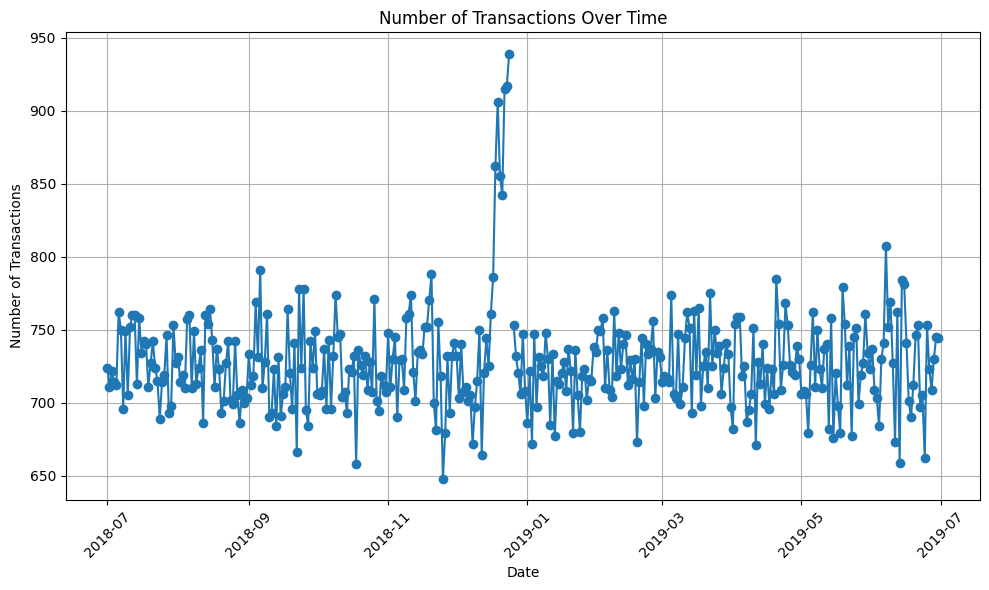

In [30]:
# Plot the chart
plt.figure(figsize=(10, 6))
plt.plot(merged_df['DATE'], merged_df['TransactionCount'], marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

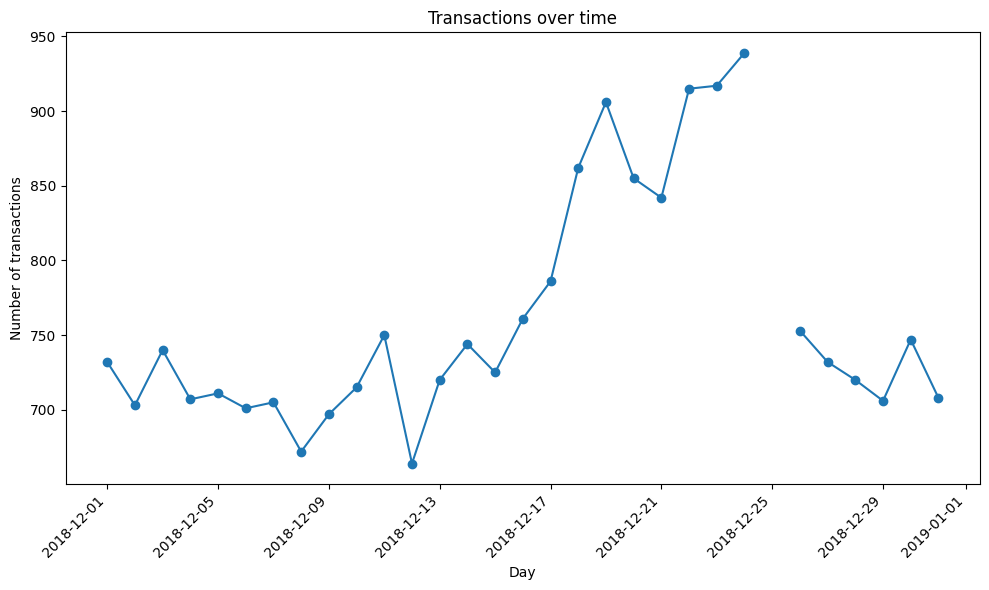

In [31]:
from matplotlib.dates import DateFormatter


# Filter to December and look at individual days
transactions_december = merged_df[merged_df['DATE'].dt.month == 12]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(transactions_december['DATE'], transactions_december['TransactionCount'], marker='o')
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.title('Transactions over time')
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
plt.tight_layout()

plt.show()

We can see that there is an increase in purchases in December and a break in late
December.We can see that the increase in sales occurs in the lead-up to Christmas and that
there are zero sales on Christmas day itself. This is due to shops being closed on
Christmas day.
Now that we are satisfied that the data no longer has outliers, we can move on to

In [32]:
# Extract pack size from PROD_NAME using regex
def extract_pack_size(s):
    match = re.search(r'(\d+)g', s)
    if match:
        return int(match.group(1))
    else:
        return None

# Create the 'PACK_SIZE' feature by extracting pack size
df['PACK_SIZE'] = df['PROD_NAME'].apply(extract_pack_size)

# Group by pack size and count the occurrences, handling missing values
pack_size_counts = df['PACK_SIZE'].value_counts(dropna=False).reset_index()
pack_size_counts.columns = ['PACK_SIZE', 'Count']
pack_size_counts = pack_size_counts.sort_values(by='PACK_SIZE')

# Display the pack size counts
print("Pack Size Counts:")
print(pack_size_counts)


Pack Size Counts:
    PACK_SIZE  Count
18         70   1507
14         90   3008
3         110  22387
20        125   1454
2         134  25102
12        135   3257
1         150  43131
16        160   2970
5         165  15297
4         170  19983
0         175  66389
19        180   1468
15        190   2995
11        200   4473
10        210   6272
17        220   1564
13        250   3169
9         270   6285
6         300  15166
7         330  12540
8         380   6416


The largest size is 380g and the smallest size is 70g - seems sensible!


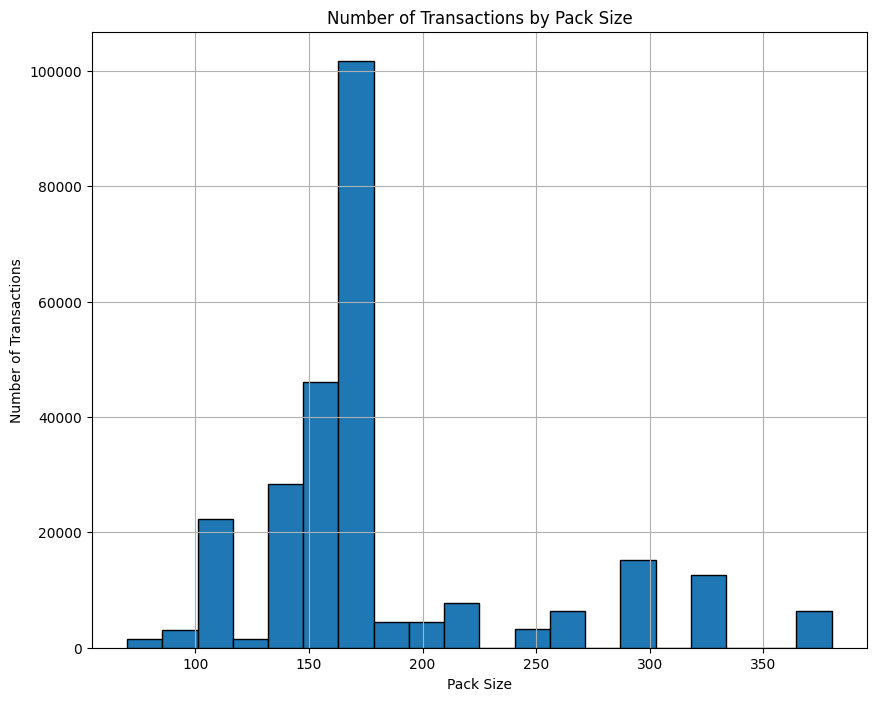

In [33]:
## Plot a histogram of the number of transactions by pack size
plt.figure(figsize = (10,8))
plt.hist(df['PACK_SIZE'],bins = 20,edgecolor='black')
plt.xlabel('Pack Size')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Pack Size')
plt.grid(True)
plt.show()

In [34]:
# Extract brand name using the first word in PROD_NAME
df['BRAND'] = df['PROD_NAME'].str.split().str[0]
df['BRAND'].unique()

array(['natural', 'red', 'grain', 'ww', 'cheetos', 'infuzions', 'rrd',
       'doritos', 'old', 'grnwves', 'smiths', 'kettle', 'ccs', 'tostitos',
       'cobs', 'burger', 'woolworths', 'thins', 'tyrrells', 'smith',
       'cheezels', 'twisties', 'sunbites', 'snbts', 'pringles', 'french',
       'infzns', 'dorito', 'ncc'], dtype=object)

In [35]:
# Clean brand names
df['BRAND'] = df['BRAND'].str.replace('RED', 'RRD')
df['BRAND'] = df['BRAND'].str.replace('SNBTS', 'SUNBITES')
df['BRAND'] = df['BRAND'].str.replace('INFZNS', 'INFUZIONS')
df['BRAND'] = df['BRAND'].str.replace('WW', 'WOOLWORTHS')
df['BRAND'] = df['BRAND'].str.replace('SMITH', 'SMITHS')
df['BRAND'] = df['BRAND'].str.replace('NCC', 'NATURAL')
df['BRAND'] = df['BRAND'].str.replace('DORITO', 'DORITOS')
df['BRAND'] = df['BRAND'].str.replace('GRAIN', 'GRNWVES')

# Check the cleaned brand names
brand_counts = df['BRAND'].value_counts().reset_index()
brand_counts.columns = ['BRAND', 'Count']
brand_counts = brand_counts.sort_values(by='BRAND')

print(brand_counts)

         BRAND  Count
24      burger   1564
17         ccs   4551
22     cheetos   2927
16    cheezels   4603
8         cobs   9693
19      dorito   3183
3      doritos  24962
28      french   1418
13       grain   6272
25     grnwves   1468
6    infuzions  11057
20      infzns   3144
0       kettle  41288
14     natural   6050
27         ncc   1419
11         old   9324
2     pringles  25102
15         red   5885
5          rrd  11894
21       smith   2963
1       smiths  28859
23       snbts   1576
26    sunbites   1432
4        thins  14075
9     tostitos   9471
10    twisties   9454
12    tyrrells   6442
18  woolworths   4437
7           ww  10320


In [36]:
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,natural chip compny seasalt175g,2,6.0,175,natural
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,red rock deli chikn&garlic aioli 150g,1,2.7,150,red
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,grain waves sour cream&chives 210g,1,3.6,210,grain
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,natural chipco hony soy chckn175g,1,3.0,175,natural
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,ww original stacked chips 160g,1,1.9,160,ww


In [37]:
df.shape

(264833, 12)

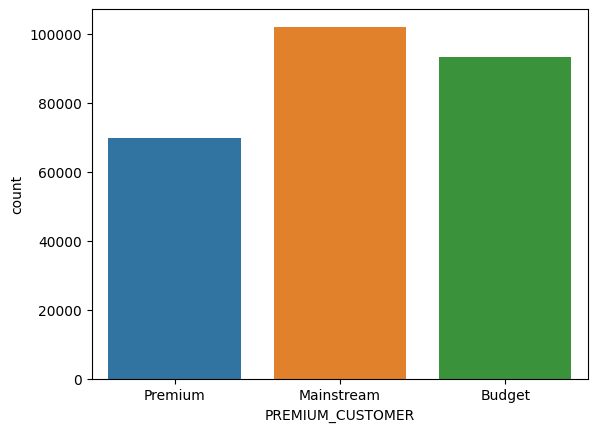

In [38]:
sns.countplot(x='PREMIUM_CUSTOMER', data=df)
plt.show()

Here, Mainstream customer segment contribute most to chip sales

<Axes: xlabel='count', ylabel='LIFESTAGE'>

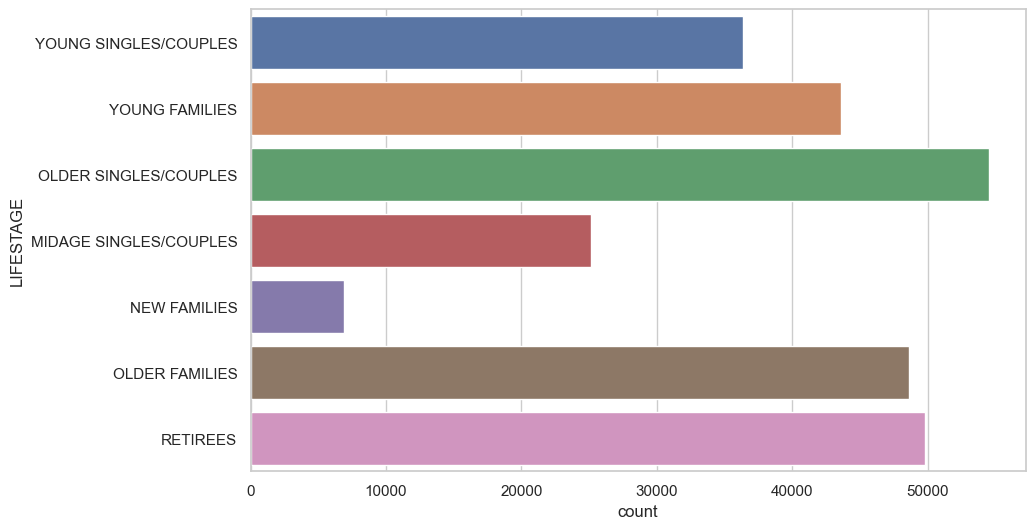

In [39]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(y='LIFESTAGE', data=df) 

<Axes: xlabel='TOT_SALES', ylabel='LIFESTAGE'>

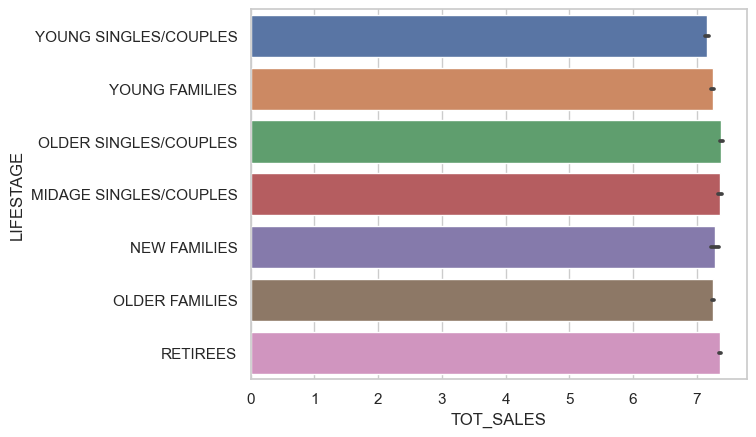

In [40]:
# Bar plot
sns.barplot(x = 'TOT_SALES' , y = 'LIFESTAGE' , data = df)

<Axes: xlabel='TOT_SALES', ylabel='PREMIUM_CUSTOMER'>

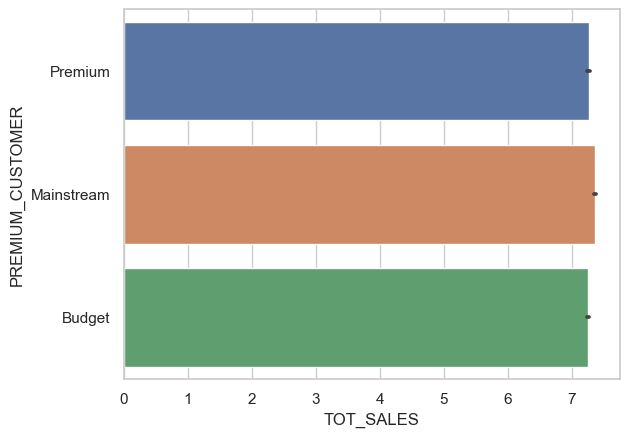

In [41]:
# Bar plot
sns.barplot(x = 'TOT_SALES' , y = 'PREMIUM_CUSTOMER' , data = df)

In [42]:
df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
dtype: int64

there are no nulls! So all our customers in the transaction data has been accounted for in the customer
dataset.

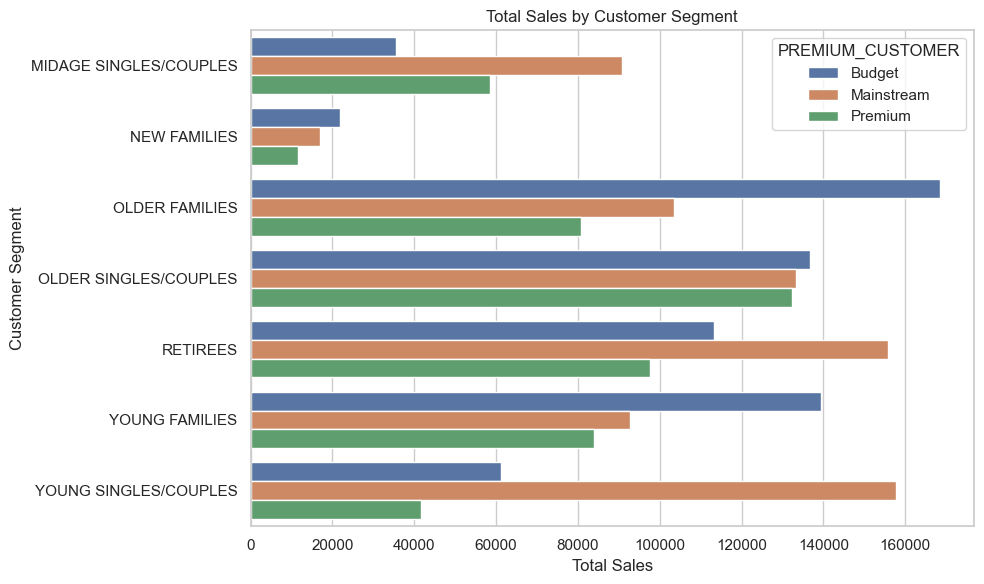

In [43]:
# Group by LIFESTAGE and PREMIUM_CUSTOMER and calculate total sales
sales_by_segment = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Set Seaborn style
sns.set(style="whitegrid")

# Create the bar plot with hue
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_segment, x='TOT_SALES', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', orient='h')
plt.xlabel('Total Sales')
plt.ylabel('Customer Segment')
plt.title('Total Sales by Customer Segment')
plt.tight_layout()
plt.show()

Sales are coming mainly from Budget - older families, Mainstream - young
singles/couples, and Mainstream - retirees

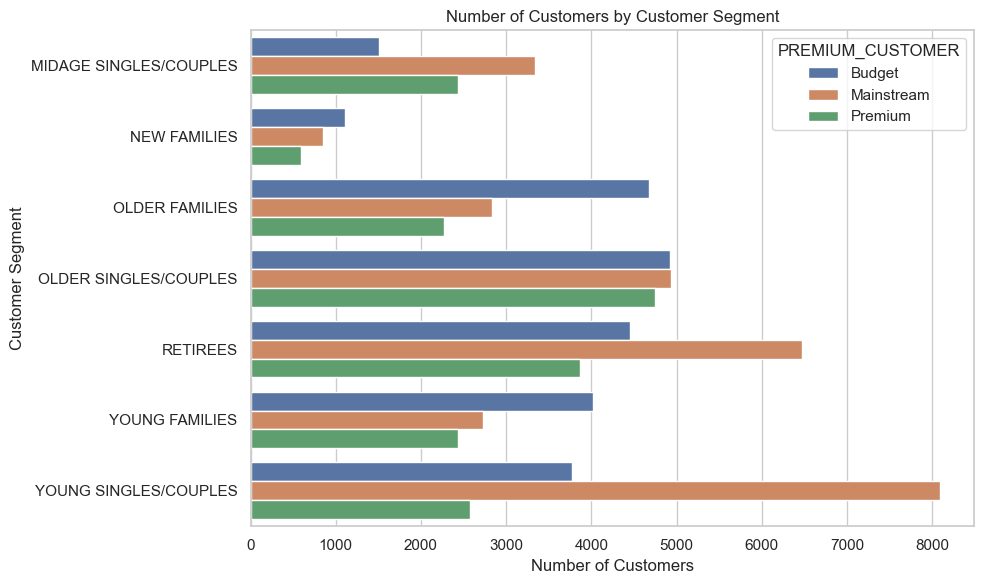

In [44]:
# Group by LIFESTAGE and PREMIUM_CUSTOMER and calculate the number of customers
customers_by_segment = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
# Set Seaborn style
sns.set(style="whitegrid")

# Create the bar plot with hue
plt.figure(figsize=(10, 6))
sns.barplot(data=customers_by_segment, x='LYLTY_CARD_NBR', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', orient='h')
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment')
plt.tight_layout()
plt.show()

# # Plot the split by segments
# plt.figure(figsize=(10, 6))
# plt.barh(customers_by_segment['LIFESTAGE'] + ' - ' + customers_by_segment['PREMIUM_CUSTOMER'], customers_by_segment['LYLTY_CARD_NBR'])
# plt.xlabel('Number of Customers')
# plt.ylabel('Customer Segment')
# plt.title('Number of Customers by Customer Segment')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

There are more Mainstream - young singles/couples and Mainstream - retirees who buy
chips. This contributes to there being more sales to these customer segments but
this is not a major driver for the Budget - Older families segment.


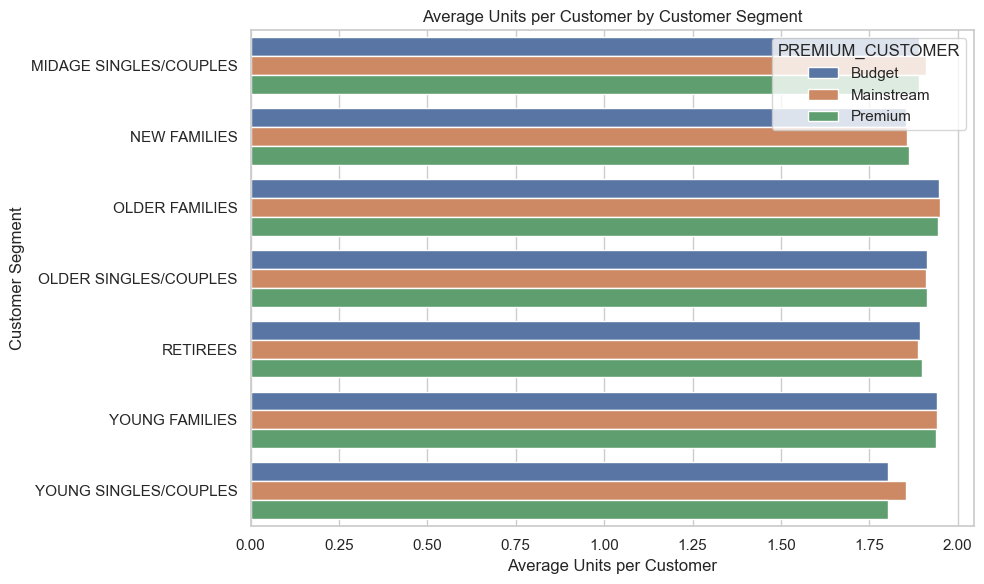

In [45]:
# Group by LIFESTAGE and PREMIUM_CUSTOMER and calculate the average units per customer
average_units_by_segment = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()

# Set Seaborn style
sns.set(style="whitegrid")

# Create the bar plot with hue and different colors
plt.figure(figsize=(10, 6))
sns.barplot(data=average_units_by_segment, x='PROD_QTY', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', orient='h')
plt.xlabel('Average Units per Customer')
plt.ylabel('Customer Segment')
plt.title('Average Units per Customer by Customer Segment')
plt.tight_layout()
plt.show()

# # Plot the split by segments
# plt.figure(figsize=(10, 6))
# plt.barh(average_units_by_segment['LIFESTAGE'] + ' - ' + average_units_by_segment['PREMIUM_CUSTOMER'], average_units_by_segment['PROD_QTY'])
# plt.xlabel('Average Units per Customer')
# plt.ylabel('Customer Segment')
# plt.title('Average Units per Customer by Customer Segment')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

Older families and young families in general buy more chips per customer

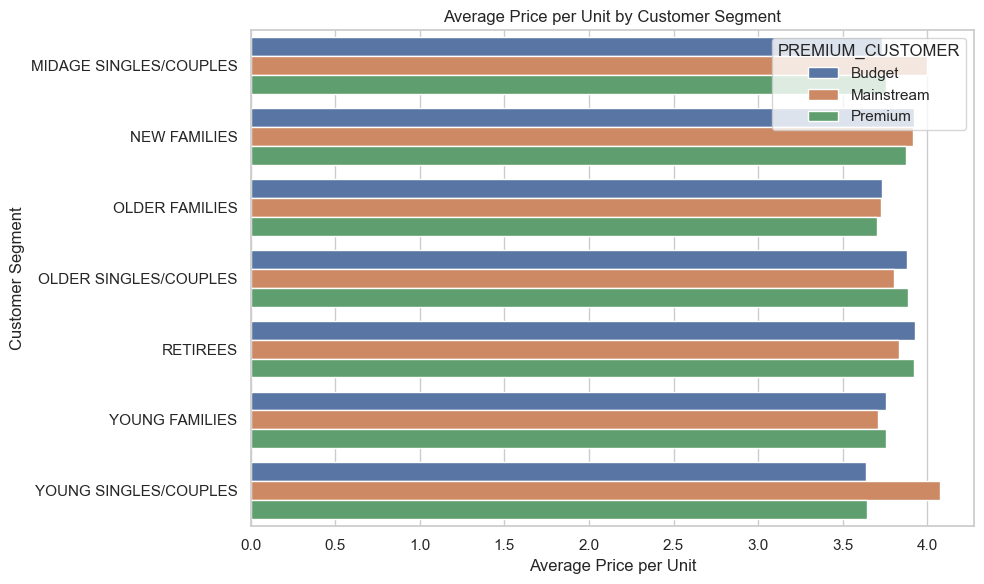

In [46]:
# Calculate average price per unit
df['AVG_PRICE_PER_UNIT'] = df['TOT_SALES'] / df['PROD_QTY']

# Group by LIFESTAGE and PREMIUM_CUSTOMER and calculate the average price per unit
average_price_by_segment = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['AVG_PRICE_PER_UNIT'].mean().reset_index()

# Set Seaborn style
sns.set(style="whitegrid")

# Create the bar plot with hue and different colors
plt.figure(figsize=(10, 6))
sns.barplot(data=average_price_by_segment, x='AVG_PRICE_PER_UNIT', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', orient='h')
plt.xlabel('Average Price per Unit')
plt.ylabel('Customer Segment')
plt.title('Average Price per Unit by Customer Segment')
plt.tight_layout()
plt.show()

# # Plot the split by segments
# plt.figure(figsize=(10, 6))
# plt.barh(average_price_by_segment['LIFESTAGE'] + ' - ' + average_price_by_segment['PREMIUM_CUSTOMER'], average_price_by_segment['AVG_PRICE_PER_UNIT'])
# plt.xlabel('Average Price per Unit')
# plt.ylabel('Customer Segment')
# plt.title('Average Price per Unit by Customer Segment')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

Mainstream midage and young singles and couples are more willing to pay more per
packet of chips compared to their budget and premium counterparts. This may be due
to premium shoppers being more likely to buy healthy snacks and when they buy
chips, this is mainly for entertainment purposes rather than their own consumption.
This is also supported by there being fewer premium midage and young singles and
couples buying chips compared to their mainstream counterparts.


##### As the difference in average price per unit isn't large, we can check if this difference is statistically different.



In [54]:
from scipy.stats import ttest_ind

# Calculate price per unit
df['AVG_PRICE_PER_UNIT'] = df['TOT_SALES'] / df['PROD_QTY']

# Filter data for t-test
mainstream_data = df[(df['LIFESTAGE'].isin(['Young Singles/ Couples', 'Midage Singles/ Couples'])) | (df['PREMIUM_CUSTOMER'] == 'Mainstream')]
non_mainstream_data = df[(df['LIFESTAGE'].isin(['Young Singles/ Couples', 'Midage Singles/ Couples'])) | (df['PREMIUM_CUSTOMER'] != 'Mainstream')]

# Perform independent t-test (two-tailed) with unequal variances
t_statistic, p_value = ttest_ind(mainstream_data['AVG_PRICE_PER_UNIT'], non_mainstream_data['AVG_PRICE_PER_UNIT'], alternative='two-sided', equal_var=False, nan_policy='omit')
# Print t-test results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Check for significance
alpha = 0.05
if not np.isnan(p_value) and p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

# #Perform an independent t-test between mainstream vs premium ,budget vs midage ,  young singles and couples
# mainstream = df[df['PREMIUM_CUSTOMER'] == 'Mainstream']
# premium = df[df['PREMIUM_CUSTOMER'] == 'Premium']

# budget = df[df['PREMIUM_CUSTOMER'] == 'Budget']
# midage = df[df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES']

# young = df[df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES']

# # Perform t-tests
# t_stat_mainstream_premium, p_value_mainstream_premium = ttest_ind(mainstream['TOT_SALES'], premium['TOT_SALES'])
# t_stat_budget_midage, p_value_budget_midage = ttest_ind(budget['TOT_SALES'], midage['TOT_SALES'])
# t_stat_budget_young, p_value_budget_young = ttest_ind(budget['TOT_SALES'], young['TOT_SALES'])

# # Print t-test results
# print("T-Test Results between Mainstream and Premium:")
# print("t-statistic:", t_stat_mainstream_premium)
# print("p-value:", p_value_mainstream_premium)

# print("\nT-Test Results between Budget and Midage Singles/Couples:")
# print("t-statistic:", t_stat_budget_midage)
# print("p-value:", p_value_budget_midage)

# print("\nT-Test Results between Budget and Young Singles/Couples:")
# print("t-statistic:", t_stat_budget_young)
# print("p-value:", p_value_budget_young)

T-Statistic: 15.722460182393345
P-Value: 1.1382865214582126e-55
Reject the null hypothesis: There is a significant difference.


The t-test results in a p-value, i.e. the unit price for mainstream,
young and mid-age singles and couples are significantly higher than
that of budget or premium, young and midage singles and couples.

In [59]:
# Deep dive into Mainstream, young singles/couples
segment1 = df[(df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (df['PREMIUM_CUSTOMER'] == 'Mainstream')]
other = df[~((df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (df['PREMIUM_CUSTOMER'] == 'Mainstream'))]

# Brand affinity compared to the rest of the population
quantity_segment1 = segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()


# Calculate brand proportions for the target segment
quantity_segment1_by_brand = segment1.groupby('BRAND')['PROD_QTY'].sum().reset_index()
quantity_segment1_by_brand['targetSegment'] = quantity_segment1_by_brand['PROD_QTY'] / quantity_segment1

# Calculate brand proportions for the other segment
quantity_other_by_brand = other.groupby('BRAND')['PROD_QTY'].sum().reset_index()
quantity_other_by_brand['other'] = quantity_other_by_brand['PROD_QTY'] / quantity_other

# Merge the brand proportions
brand_proportions = pd.merge(quantity_segment1_by_brand, quantity_other_by_brand, on='BRAND')

# Calculate affinity to brand
brand_proportions['affinityToBrand'] = brand_proportions['targetSegment'] / brand_proportions['other']

# Sort by affinity to brand in descending order
brand_proportions = brand_proportions.sort_values(by='affinityToBrand', ascending=False)

brand_proportions


,BRAND,PROD_QTY_x,targetSegment,PROD_QTY_y,other,affinityToBrand
5,dorito,569,0.014729,5540,0.011886,1.239153
26,tyrrells,1143,0.029587,11155,0.023933,1.236230
25,twisties,1673,0.043306,16445,0.035283,1.227396
12,kettle,7172,0.185649,71879,0.154217,1.203818
24,tostitos,1645,0.042581,16489,0.035377,1.203633
15,old,1607,0.041598,16198,0.034753,1.196953
11,infzns,541,0.014004,5459,0.011712,1.195657
16,pringles,4326,0.111980,43693,0.093744,1.194531
8,grain,1055,0.027309,10907,0.023401,1.166997
6,doritos,4178,0.108149,43529,0.093392,1.158010


In [ ]:
We can see that :
• Mainstream young singles/couples are 29% more likely to purchase Tyrrells chips compared to the
rest of the population
• Mainstream young singles/couples are 98% less likely to purchase Sunbites compared to the rest
of the population

In [60]:
# Calculate pack proportions for the target segment
quantity_segment1_by_pack = segment1.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
quantity_segment1_by_pack['targetSegment'] = quantity_segment1_by_pack['PROD_QTY'] / quantity_segment1

# Calculate pack proportions for the other segment
quantity_other_by_pack = other.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
quantity_other_by_pack['other'] = quantity_other_by_pack['PROD_QTY'] / quantity_other

# Merge the pack proportions
pack_proportions = pd.merge(quantity_segment1_by_pack, quantity_other_by_pack, on='PACK_SIZE')

# Calculate affinity to pack
pack_proportions['affinityToPack'] = pack_proportions['targetSegment'] / pack_proportions['other']

# Sort by affinity to pack in descending order
pack_proportions = pack_proportions.sort_values(by='affinityToPack', ascending=False)

print(pack_proportions)


    PACK_SIZE  PROD_QTY_x  targetSegment  PROD_QTY_y     other  affinityToPack
17        270        1153       0.029846       10896  0.023377        1.276688
20        380        1165       0.030156       11108  0.023832        1.265356
19        330        2220       0.057465       21779  0.046727        1.229809
4         134        4326       0.111980       43693  0.093744        1.194531
2         110        3850       0.099658       38985  0.083643        1.191477
14        210        1055       0.027309       10907  0.023401        1.166997
5         135         535       0.013849        5677  0.012180        1.136992
16        250         520       0.013460        5549  0.011905        1.130606
9         170        2926       0.075740       35162  0.075440        1.003976
18        300        2123       0.054954       26690  0.057264        0.959675
10        175        9237       0.239102      117228  0.251514        0.950653
6         150        5993       0.155130       76181

It looks like Mainstream young singles/couples are 29% more likely to purchase a 270g pack of chips compared to the rest of the population but let’s dive into what brands sell this pack size.

In [50]:
csv_filename = 'QVI_DATA.csv'  # Change this to your desired filename
df.to_csv('QVI_DATA', index=False)

In [64]:
df[df['PACK_SIZE'] == 270]['PROD_NAME'].unique()

array(['twisties cheese     270g', 'twisties chicken270g'], dtype=object)

Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of
purchasing Twisties.